<IPython.core.display.Javascript object>


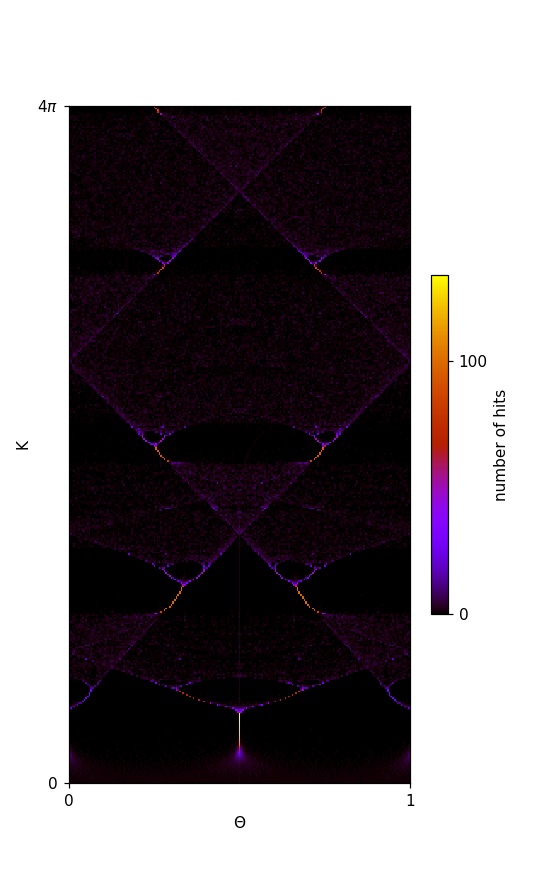

In [42]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

def circle(theta, omega, K):
    return (theta + omega - K * np.sin(2 * np.pi * theta)) %1

def getwind(K, W, THETA):
    omega = 0.5
    row = len(THETA)
    col = len(THETA[0])
    C = []
    CC = []
    for i in range(row):
        k = K[i][0]
        for j in range(col):
            theta = THETA[0][j]
            if i == 50:
                CC.append(theta)
            for kk in range(20):
                theta = circle(theta, omega,k)
            index = int(((theta + .5)%1)*col)
            W[i][index] += 1
            if i == 50:
                C.append(theta*col)
    return W

dx = .005
y = np.arange(0,2+dx,dx)
x = np.arange(0,1+dx,dx)
THETA, K = np.meshgrid(x,y)
W = K*0.0 
W = getwind(K, W, THETA)

KK=K*2*np.pi

row = len(THETA)
col = len(THETA[0])
for i in range(row):
    for j in range(col):
        if W[i][j] > 200:
            W[i][j] = 200


f, ax = plt.subplots(figsize=(5,8))
cc = ax.pcolormesh(THETA,KK,W, cmap ='gnuplot')

ax.yaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.yaxis.set_major_locator(MultipleLocator(base=4*np.pi))
ax.xaxis.set_major_locator(MultipleLocator(base=1))

cbar = f.colorbar(cc, ax=ax, shrink = .5)
plt.xlabel('$\Theta$')
plt.ylabel('K')
cbar.set_label('number of hits')
cbar.set_ticks([0,100,200])
cbar.set_ticklabels([0,100,200])
plt.savefig('bifurcation.png')




<IPython.core.display.Javascript object>


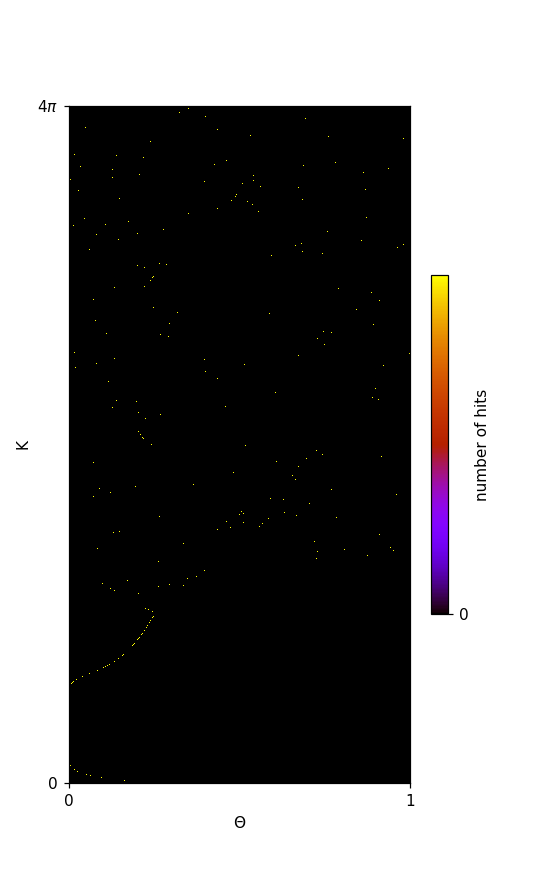

In [16]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

def circle(theta, omega, K):
    return (theta + omega - K * np.sin(2 * np.pi * theta)) %1

def getwind(K, W, THETA):
    omega = 0.0001
    row = len(THETA)
    col = len(THETA[0])
    for i in range(row):
        k = K[i][0]
        theta = .25
        for kk in range(10):
            theta = circle(theta, omega,k)
        W[i][int(theta*col)] += 1
    return W

dx = .001
y = np.arange(0,2+dx,dx)
x = np.arange(0,1+dx,dx)
THETA, K = np.meshgrid(x,y)
W = K*0.0 
W = getwind(K, W, THETA)

KK=K*2*np.pi

row = len(THETA)
col = len(THETA[0])
for i in range(row):
    for j in range(col):
        if W[i][j] > 200:
            W[i][j] = 200


f, ax = plt.subplots(figsize=(5,8))
cc = ax.pcolormesh(THETA,KK,W, cmap ='gnuplot')

ax.yaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.yaxis.set_major_locator(MultipleLocator(base=4*np.pi))
ax.xaxis.set_major_locator(MultipleLocator(base=1))

cbar = f.colorbar(cc, ax=ax, shrink = .5)
plt.xlabel('$\Theta$')
plt.ylabel('K')
cbar.set_label('number of hits')
cbar.set_ticks([0,100,200])
cbar.set_ticklabels([0,100,200])
plt.savefig('bifurcation.png')




In [6]:
round(5.49,2)

5.49

In [5]:
np.max(W)


200.0